<a href="https://colab.research.google.com/github/ccassimiro/ARIMA_COVID19/blob/main/DadosCovid_19RJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [ ]:
df = pd.read_csv("brazil_covid19_cities.csv")
df.head(2)

,date,state,name,code,cases,deaths
0,2020-03-27,AC,Acrelândia,120001.0,0,0
1,2020-03-27,AC,Assis Brasil,120005.0,0,0


In [ ]:
rj_city = df.loc[df.name == "Rio de Janeiro"]
rj_city.head(2)

,date,state,name,code,cases,deaths
3660,2020-03-27,RJ,Rio de Janeiro,330455.0,0,0
9230,2020-03-28,RJ,Rio de Janeiro,330455.0,489,9


In [ ]:
rj_city = rj_city.set_index('date')
rj_city.index = pd.to_datetime(rj_city.index, format='%Y-%m-%d')
rj_city = rj_city[['state','deaths']].groupby('date').sum()
rj_city.head(2)

,deaths
date,
2020-03-27,0
2020-03-28,9


In [ ]:
rj_city.iloc[[0, -1]]

,deaths
date,
2020-03-27,0
2020-11-25,13115


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

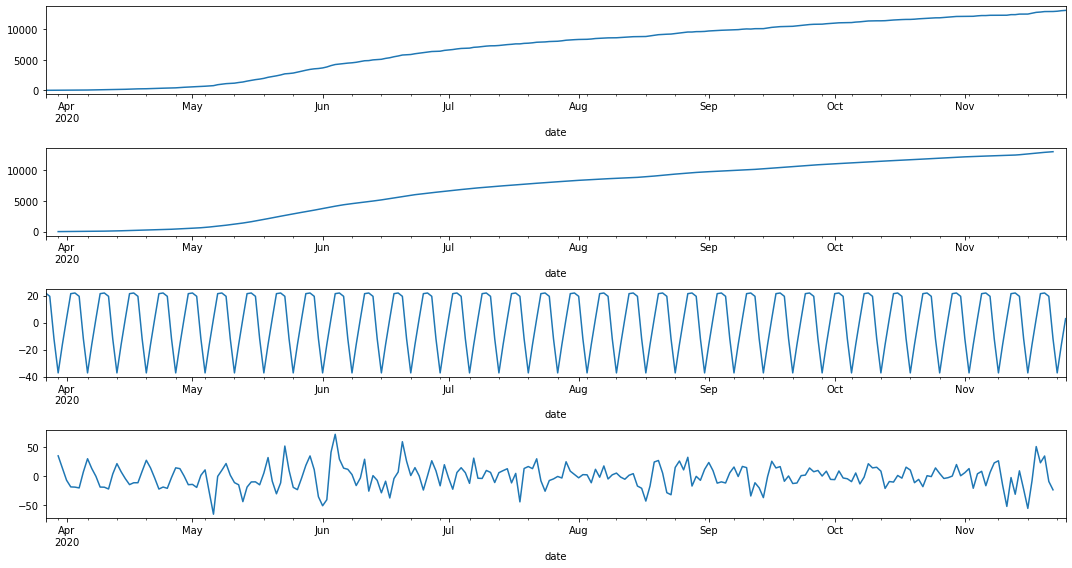

In [ ]:
seasonplot = seasonal_decompose(rj_city)
# plotar a decomposicao
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15,8))
seasonplot.observed.plot(ax=ax1)
seasonplot.trend.plot(ax=ax2)
seasonplot.seasonal.plot(ax=ax3)
seasonplot.resid.plot(ax=ax4)
plt.tight_layout()

In [ ]:
pip install pmdarima

In [ ]:
from pmdarima.arima import auto_arima
bruteforce_modelo = auto_arima(rj_city, start_p=0, start_d=0 ,start_q=0,max_p=8, max_d=8,max_q=8, m=7, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore',suppress_warnings=True, stepwise=False)

 ARIMA(0,1,0)(0,1,0)[7]             : AIC=2366.631, Time=0.02 sec
 ARIMA(0,1,0)(0,1,1)[7]             : AIC=2341.782, Time=0.13 sec
 ARIMA(0,1,0)(0,1,2)[7]             : AIC=2343.756, Time=0.43 sec
 ARIMA(0,1,0)(1,1,0)[7]             : AIC=2344.778, Time=0.12 sec
 ARIMA(0,1,0)(1,1,1)[7]             : AIC=2343.751, Time=0.27 sec
 ARIMA(0,1,0)(1,1,2)[7]             : AIC=2334.571, Time=2.26 sec
 ARIMA(0,1,0)(2,1,0)[7]             : AIC=2344.492, Time=0.26 sec
 ARIMA(0,1,0)(2,1,1)[7]             : AIC=2333.890, Time=1.89 sec
 ARIMA(0,1,0)(2,1,2)[7]             : AIC=2335.888, Time=2.87 sec
 ARIMA(0,1,1)(0,1,0)[7]             : AIC=2364.469, Time=0.07 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=2331.456, Time=0.27 sec
 ARIMA(0,1,1)(0,1,2)[7]             : AIC=2333.185, Time=0.67 sec
 ARIMA(0,1,1)(1,1,0)[7]             : AIC=2337.612, Time=0.18 sec
 ARIMA(0,1,1)(1,1,1)[7]             : AIC=2326.917, Time=1.02 sec
 ARIMA(0,1,1)(1,1,2)[7]             : AIC=2322.685, Time=2.74 sec
 ARIMA(0,1

In [ ]:
print(f"Resultado AIC: {bruteforce_modelo.aic()}")
print(f"Resultado melhores parametros (p,d,q): {bruteforce_modelo.order}")

Resultado AIC: 2273.7404787896858
Resultado melhores parametros (p,d,q): (1, 1, 1)


In [ ]:
futuro_forecast = bruteforce_modelo.predict(n_periods=30)

In [ ]:
import datetime 
dataatual = datetime.datetime.today()
dataatual = datetime.datetime.today() - datetime.timedelta(days=1)
lista_datas = [dataatual + datetime.timedelta(days=x) for x in range(30)]
lista_datas = [pd.datetime.strftime(i,'%Y-%m-%d') for i in lista_datas]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.



In [ ]:
futuro_forecast = bruteforce_modelo.predict(n_periods=30)
futuro_forecast = pd.DataFrame(futuro_forecast,index = lista_datas,columns=["deaths"])
futuro_forecast.index.name = 'data'
futuro_forecast.index = pd.to_datetime(futuro_forecast.index)
futuro_forecast.deaths = round(futuro_forecast.deaths,0)
futuro_forecast.head(2)

,deaths
data,
2020-11-27,13177.0
2020-11-28,13229.0


In [ ]:
final = pd.concat([rj_city,futuro_forecast])
final.head(2)

,deaths
2020-03-27,0.0
2020-03-28,9.0


In [ ]:
import plotly.graph_objects as go   
import plotly.express as px

fig = go.Figure()
fig.add_trace(go.Scatter(x=rj_city.index, y=rj_city.deaths,mode='lines+markers',
                    name='Atual'))

fig.add_trace(go.Scatter(x=futuro_forecast.index, y=futuro_forecast.deaths,mode='lines+markers', name='Previsto',
line=dict(dash='dashdot')))

fig.update_layout(title="Previsão para os proximos 30 dias, mortes acumuladas por COVID-19 na cidade do Rio de Janeiro", width=1200, height=600)
fig.show()

In [ ]:
dataatual = datetime.datetime.today()
dataatual = datetime.datetime.today() - datetime.timedelta(days=15)
lista_datas = [dataatual + datetime.timedelta(days=x) for x in range(15)]
lista_datas = [pd.datetime.strftime(i,'%Y-%m-%d') for i in lista_datas]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.



In [ ]:
lista_datas

['2020-11-13',
 '2020-11-14',
 '2020-11-15',
 '2020-11-16',
 '2020-11-17',
 '2020-11-18',
 '2020-11-19',
 '2020-11-20',
 '2020-11-21',
 '2020-11-22',
 '2020-11-23',
 '2020-11-24',
 '2020-11-25',
 '2020-11-26',
 '2020-11-27']

In [ ]:
df_validacao = rj_city.iloc[0:-14]

In [ ]:
df_validacao.iloc[[0,-1]]

,deaths
date,
2020-03-27,0
2020-11-11,12322


In [ ]:
from pmdarima.arima import auto_arima
valid_model = auto_arima(df_validacao, start_p=0, start_d=0 ,start_q=0,max_p=8, max_d=8,max_q=8, m=7, start_P=0, seasonal=False, trace=True, error_action='ignore',suppress_warnings=True, stepwise=False)

/usr/local/lib/python3.6/dist-packages/pmdarima/arima/_validation.py:60: UserWarning:

m (7) set for non-seasonal fit. Setting to 0



 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=2329.670, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=2261.072, Time=0.10 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=2252.029, Time=0.31 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=2253.536, Time=0.23 sec
 ARIMA(0,2,4)(0,0,0)[0] intercept   : AIC=2250.924, Time=0.70 sec
 ARIMA(0,2,5)(0,0,0)[0] intercept   : AIC=2240.630, Time=0.48 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=2307.894, Time=0.09 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=2253.710, Time=0.15 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=2252.679, Time=0.37 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=2246.053, Time=0.44 sec
 ARIMA(1,2,4)(0,0,0)[0] intercept   : AIC=2254.841, Time=1.15 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=2294.781, Time=0.11 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=2252.738, Time=0.20 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=2253.030, Time=0.33 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=2199.610, Time=0.93 sec
 ARIMA(3,2

In [ ]:
print(f"Resultado AIC: {valid_model.aic()}")
print(f"Resultado melhores parametros (p,d,q): {valid_model.order}")

Resultado AIC: 2199.6097628777798
Resultado melhores parametros (p,d,q): (2, 2, 3)


In [ ]:
valid_forecast = valid_model.predict(n_periods=15)
valid_forecast = pd.DataFrame(valid_forecast,index = lista_datas,columns=["deaths"])
valid_forecast.index.name = 'data'
valid_forecast.index = pd.to_datetime(valid_forecast.index)
valid_forecast.deaths = round(valid_forecast.deaths,0)
valid_forecast.head(2)

,deaths
data,
2020-11-13,12356.0
2020-11-14,12374.0


In [ ]:

import plotly.graph_objects as go   
import plotly.express as px

fig = go.Figure()
fig.add_trace(go.Scatter(x=rj_city.index, y=rj_city.deaths,mode='lines+markers',
                    name='Atual'))

fig.add_trace(go.Scatter(x=valid_forecast.index, y=valid_forecast.deaths,mode='lines+markers', name='Validação 15 dias',
line=dict(dash='dashdot')))

fig.add_trace(go.Scatter(x=futuro_forecast.index, y=futuro_forecast.deaths,mode='lines+markers', name='Previsão para 30 dias',
line=dict(dash='dashdot')))

fig.update_layout(title="Validando eficiência do modelo com dados ja existentes.", width=1200, height=600)
fig.show()